<a href="https://colab.research.google.com/github/sandhya2005-png/Codsoft-internship-porojects/blob/main/MOVIE_RATING_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK-2: MOVIE RATING PREDICTION**

---


**NAME : SANDHYA V**

---


**BATCH: APRIL20-MAY20**

---


**DOMAIN : DATA SCIENCE**

---


**AIM : BUILD A MODEL THAT PREDICTS THE RATING OF A MOVIE BASED ON FEATURES LIKES GENRE,DIRECTOR AND ACTORS**

In [ ]:
#data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df_movie=pd.read_csv('/content/movies.dat',sep="::",engine='python',encoding='latin-1')
df_movie

,1,Toy Story (1995),Animation|Children's|Comedy
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
...,...,...,...
3877,3948,Meet the Parents (2000),Comedy
3878,3949,Requiem for a Dream (2000),Drama
3879,3950,Tigerland (2000),Drama
3880,3951,Two Family House (2000),Drama


In [ ]:
df_movie.columns=['MoviedIDs','MovieName','Category']
df_movie.dropna(inplace=True)
df_movie.head()

,MoviedIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [ ]:
df_rating=pd.read_csv('/content/ratings.dat',sep='::',engine='python',encoding='latin-1')
df_rating

,1,1193,5,978300760
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268
...,...,...,...,...
1000203,6040,1091,1,956716541
1000204,6040,1094,5,956704887
1000205,6040,562,5,956704746
1000206,6040,1096,4,956715648


In [ ]:
df_rating.columns=['ID','MoviesID','Ratings','TimeStamp']
df_rating.dropna(inplace=True)
df_rating.head()

,ID,MoviesID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [ ]:
df_user=pd.read_csv('/content/users.dat',sep="::",engine='python',encoding='latin-1')
df_user

,1,F,1.1,10,48067
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
...,...,...,...,...,...
6034,6036,F,25,15,32603
6035,6037,F,45,1,76006
6036,6038,F,56,1,14706
6037,6039,F,45,0,01060


In [ ]:
df_user.columns=['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [ ]:
df_combined=pd.concat([df_user,df_rating,df_movie],axis=1)
#displaying the combined dataset
print(df_combined.head())

   UserID Gender   Age  Occupation Zip-code  ID  MoviesID  Ratings  TimeStamp  \
0     2.0      M  56.0        16.0    70072   1       661        3  978302109   
1     3.0      M  25.0        15.0    55117   1       914        3  978301968   
2     4.0      M  45.0         7.0    02460   1      3408        4  978300275   
3     5.0      M  25.0        20.0    55455   1      2355        5  978824291   
4     6.0      F  50.0         9.0    55117   1      1197        3  978302268   

   MoviedIDs                           MovieName                      Category  
0        2.0                      Jumanji (1995)  Adventure|Children's|Fantasy  
1        3.0             Grumpier Old Men (1995)                Comedy|Romance  
2        4.0            Waiting to Exhale (1995)                  Comedy|Drama  
3        5.0  Father of the Bride Part II (1995)                        Comedy  
4        6.0                         Heat (1995)         Action|Crime|Thriller  


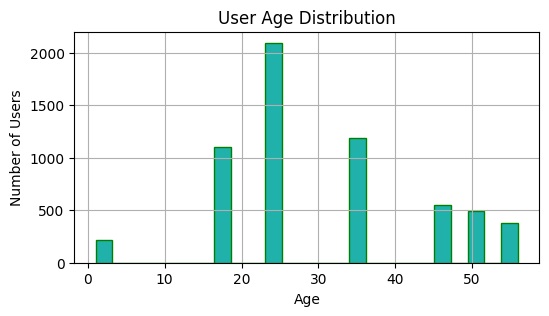

In [ ]:
#create a histogram to visualize the user age distribution
plt.figure(figsize=(6,3))
plt.hist(df_user['Age'],bins=25,color='lightseagreen',edgecolor='green')
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.grid(True)

In [ ]:
#1. Define age bins and labels
age_bins=[0, 18, 25, 35, 45, 55, 65, 100]
age_labels=['0-18','19-25','26-35','36-45','46-55','56-65','66+']

#2. Add a new column with age groups
df_combined['Age Group']=pd.cut(df_combined['Age'],bins=age_bins,labels=age_labels)
df_combined[['Age','Age Group']].drop_duplicates()[:10]

,Age,Age Group
0,56.0,56-65
1,25.0,19-25
2,45.0,36-45
4,50.0,46-55
5,35.0,26-35
16,18.0,0-18
17,1.0,0-18
6039,NaN,NaN


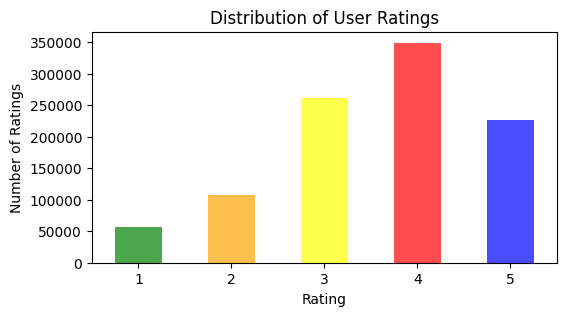

In [ ]:
rating_counts = df_rating['Ratings'].value_counts().sort_index()

colors = ['green', 'orange', 'yellow', 'red', 'blue']

plt.figure(figsize=(6,3))
rating_counts.plot(kind='bar' ,alpha=0.7, color=colors)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=0)
plt.show()

In [ ]:
groupedby_movieName=df_combined.groupby('MovieName')
groupedby_rating=df_combined.groupby('Ratings')
grouped_uid=df_combined.groupby('UserID')

In [ ]:
movies=df_combined.groupby('MovieName').size().sort_values(ascending=True)[:1000]
print(movies)

MovieName
$1,000,000 Duck (1971)                   1
Only Angels Have Wings (1939)            1
Only You (1994)                          1
Open Season (1996)                       1
Open Your Eyes (Abre los ojos) (1997)    1
                                        ..
Toy Story 2 (1999)                       1
Toys (1992)                              1
Total Eclipse (1995)                     1
Trading Places (1983)                    1
Tom & Viv (1994)                         1
Length: 1000, dtype: int64


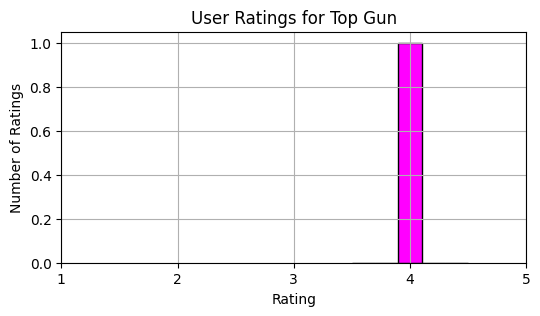

In [ ]:
top_gun_data=df_combined[df_combined['MovieName'] =='Top Gun (1986)']

plt.figure(figsize=(6,3))
plt.hist(top_gun_data['Ratings'],bins=5,color='magenta',edgecolor='black')
plt.title('User Ratings for Top Gun')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks(range(1,6))
plt.grid(True)
plt.show()

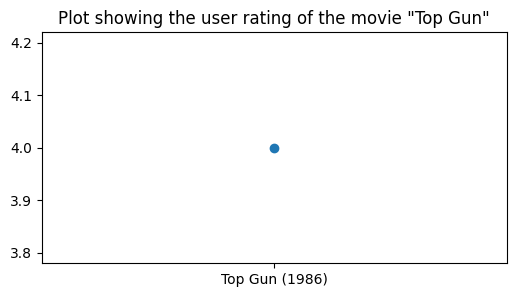

In [ ]:
plt.figure(figsize=(6,3))
plt.scatter(top_gun_data['MovieName'],top_gun_data['Ratings'])
plt.title('Plot showing the user rating of the movie "Top Gun"')
plt.show()

In [ ]:
print(df_combined.head())

   UserID Gender   Age  Occupation Zip-code  ID  MoviesID  Ratings  TimeStamp  \
0     2.0      M  56.0        16.0    70072   1       661        3  978302109   
1     3.0      M  25.0        15.0    55117   1       914        3  978301968   
2     4.0      M  45.0         7.0    02460   1      3408        4  978300275   
3     5.0      M  25.0        20.0    55455   1      2355        5  978824291   
4     6.0      F  50.0         9.0    55117   1      1197        3  978302268   

   MoviedIDs                           MovieName  \
0        2.0                      Jumanji (1995)   
1        3.0             Grumpier Old Men (1995)   
2        4.0            Waiting to Exhale (1995)   
3        5.0  Father of the Bride Part II (1995)   
4        6.0                         Heat (1995)   

                       Category Age Group  
0  Adventure|Children's|Fantasy     56-65  
1                Comedy|Romance     19-25  
2                  Comedy|Drama     36-45  
3                       

In [ ]:
top_gun_data[['MovieName','Age Group']]

,MovieName,Age Group
1084,Top Gun (1986),0-18


<ipython-input-46-46f00f235c40>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette=plt.cm.get_cmap('tab20',len(top_25_movies))


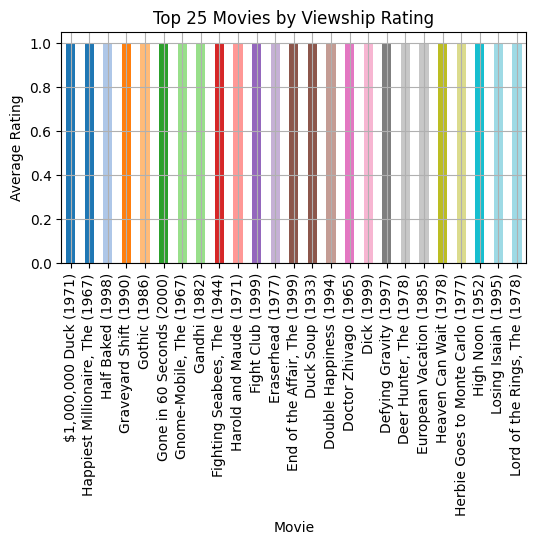

In [ ]:
movie_ratings=df_combined.groupby('MovieName')['Ratings'].mean()

sorted_movies=movie_ratings.sort_values(ascending=True)

top_25_movies=sorted_movies.head(25)

plt.figure(figsize=(6,3))
color_palette=plt.cm.get_cmap('tab20',len(top_25_movies))
top_25_movies.plot(kind='bar',color=color_palette.colors)
plt.title('Top 25 Movies by Viewship Rating')
plt.xlabel('Movie')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [ ]:
if 'groupedby_uid' not in globals():
    groupedby_uid = df_combined.groupby('UserID')

userid_2696=groupedby_uid.get_group(2696)
userid_2696[['UserID','Ratings']]

,UserID,Ratings
2694,2696.0,3


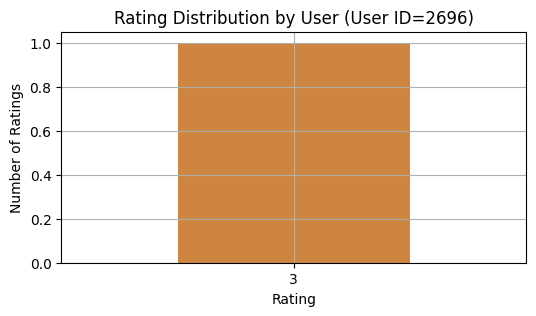

In [ ]:
user_2696_data=df_combined[df_combined['UserID']==2696]

plt.figure(figsize=(6,3))
user_2696_data['Ratings'].value_counts().sort_index().plot(kind='bar',color='peru')
plt.title('Rating Distribution by User (User ID=2696)')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

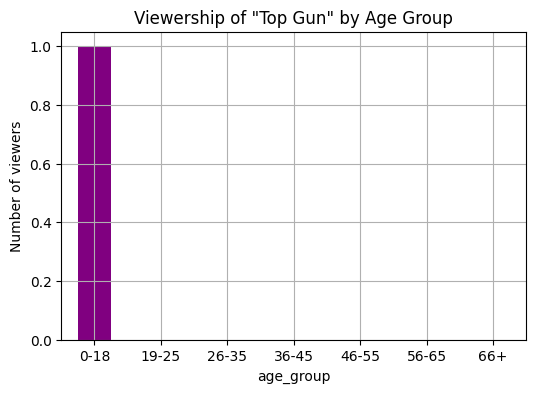

In [ ]:
age_group_viewership=top_gun_data.groupby('Age Group').size()

plt.figure(figsize=(6,4))
age_group_viewership.plot(kind='bar',color='purple')
plt.title('Viewership of "Top Gun" by Age Group')
plt.xlabel('age_group')
plt.ylabel('Number of viewers')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

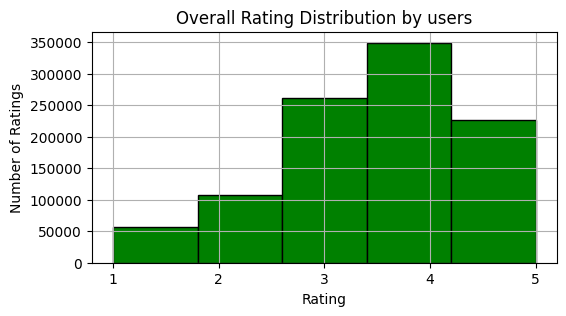

In [ ]:
plt.figure(figsize=(6,3))
plt.hist(df_combined['Ratings'],bins=5,color='green',edgecolor='black')
plt.title('Overall Rating Distribution by users')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks(range(1,6))
plt.grid(True)
plt.show()

In [ ]:
df_500=df_combined.head(500)
df_500.dropna(inplace=True)

<ipython-input-66-883e91b88930>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_500.dropna(inplace=True)


In [ ]:
features = df_500[['MoviesID', 'Age', 'Occupation']].values


In [ ]:
labels=df_500['Ratings'].values

In [ ]:
train,test,train_label,test_label=train_test_split(features,labels,test_size=0.33,random_state=42)

In [ ]:
print("X_train shape:",train.shape)
print("y_train shape:",train_label.shape)
print("X_test shape:",test.shape)
print("y_test shape:",test_label.shape)

X_train shape: (335, 3)
y_train shape: (335,)
X_test shape: (165, 3)
y_test shape: (165,)


Text(0.5, 0, 'Ratings')

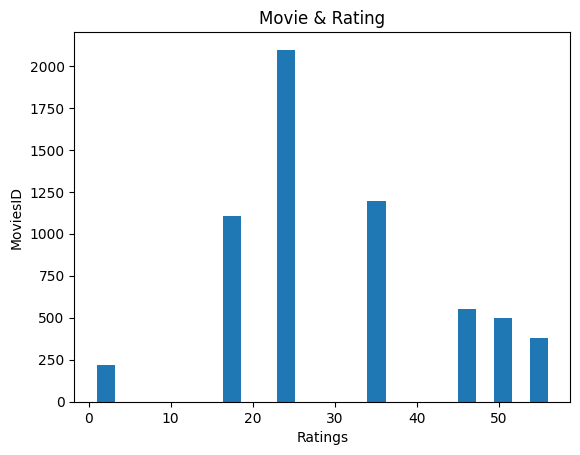

In [ ]:
df_combined.Age.plot.hist(bins=25)
plt.title('Movie & Rating')
plt.ylabel('MoviesID')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

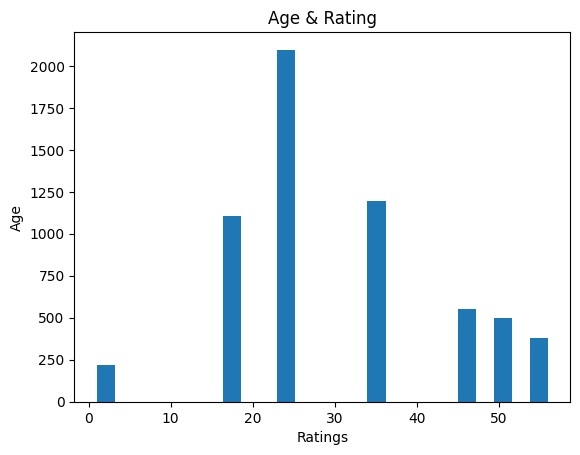

In [ ]:
df_combined.Age.plot.hist(bins=25)
plt.title("Age & Rating")
plt.ylabel('Age')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

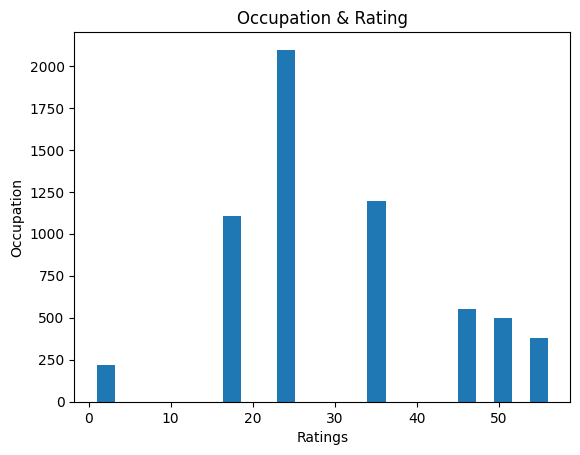

In [ ]:
df_combined.Age.plot.hist(bins=25)
plt.title("Occupation & Rating")
plt.ylabel('Occupation')
plt.xlabel('Ratings')

In [ ]:
logreg=LogisticRegression()
logreg.fit(train,train_label)
Y_pred = logreg.predict(test)
acc_log=round(logreg.score(test,test_label)*100,2)
acc_log

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


36.36

In [ ]:
svc=SVC()
svc.fit(train,train_label)
Y_pred=svc.predict(test)
acc_svc=round(svc.score(train,train_label)*100,2)
acc_svc

35.22

In [ ]:

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train,train_label)
Y_pred=knn.predict(test)
acc_knn=round(knn.score(train,train_label)*100,2)
acc_knn

55.22

In [ ]:
gaussian=GaussianNB()
gaussian.fit(train,train_label)
Y_pred=gaussian.predict(test)
acc_gaussian=round(gaussian.score(train,train_label)*100,2)
acc_gaussian

35.22

In [ ]:
perceptron=Perceptron()
perceptron.fit(train,train_label)
Y_pred=perceptron.predict(test)
acc_perceptron=round(perceptron.score(train,train_label)*100,2)
acc_perceptron

27.76

In [ ]:
linear_svc=LinearSVC()
linear_svc.fit(train,train_label)
Y_pred=linear_svc.predict(test)
acc_linear_svc=round(linear_svc.score(train,train_label)*100,2)
acc_linear_svc

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


19.1

In [ ]:
sgd=SGDClassifier()
sgd.fit(train,train_label)
Y_pred=sgd.predict(test)
acc_sgd=round(sgd.score(train,train_label)*100,2)
acc_sgd

27.46

In [ ]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(train,train_label)
Y_pred=decision_tree.predict(test)
acc_decision_tree=round(decision_tree.score(train,train_label)*100,2)
acc_decision_tree

99.1

In [ ]:
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(train,train_label)
Y_pred=random_forest.predict(test)
random_forest.score(train,train_label)
acc_random_forest=round(random_forest.score(train,train_label)*100,2)
acc_random_forest


99.1

In [ ]:
models=pd.DataFrame({
    'Model':['Support Vector Machines','KNN','Logistic Regression',
             'Random Forest','Naive Bayes','Perceptron',
             'Stochastic Gradient Decent','Linear SVC',
             'Decision Tree'],
    'Score':[acc_svc,acc_knn,acc_log,
             acc_random_forest,acc_gaussian,acc_perceptron,
             acc_sgd,acc_linear_svc,acc_decision_tree]})
models.sort_values(by='Score',ascending=False)

,Model,Score
3,Random Forest,99.10
8,Decision Tree,99.10
1,KNN,55.22
2,Logistic Regression,36.36
0,Support Vector Machines,35.22
4,Naive Bayes,35.22
5,Perceptron,27.76
6,Stochastic Gradient Decent,27.46
7,Linear SVC,19.10
